In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"data.csv")

In [3]:
df.shape

(9825, 3)

In [4]:
df.head()

,Header_review,review_text,rating
0,Value-for-money,"Amazing Product, bass is amazing and easy to c...",4.0
1,Perfect product!,Worth it If you think to buy a tws then it is ...,5.0
2,Just okay,Good and well but still some batter time impro...,3.0
3,Not recommended at all,As they rightly say about Chinese Products: Ch...,1.0
4,Just okay,I am writing this review after using this prod...,3.0


<h3>Using only header review

In [5]:
df = df[['Header_review','rating']]
df.head()

,Header_review,rating
0,Value-for-money,4.0
1,Perfect product!,5.0
2,Just okay,3.0
3,Not recommended at all,1.0
4,Just okay,3.0


In [6]:
def preprocess_text(s):
    l=[]
    for i in s:
        if (i.isalnum()) or (i==' '):
            l.append(i.lower())
        else:
            l.append(' ')
    return ''.join(l).strip()

In [7]:
print(preprocess_text('Value-for-money'))

value for money


In [8]:
df['Header_review'] = df['Header_review'].apply(lambda x : preprocess_text(x))

In [9]:
df.head()

,Header_review,rating
0,value for money,4.0
1,perfect product,5.0
2,just okay,3.0
3,not recommended at all,1.0
4,just okay,3.0


In [10]:
df.rating.value_counts()

5.0    5000
4.0    2245
1.0    1188
3.0     966
2.0     426
Name: rating, dtype: int64

In [11]:
X=df.iloc[:,df.columns !='rating']
y=df.iloc[:,df.columns =='rating']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score,log_loss


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=101)

In [14]:
X_train.shape,X_test.shape

((7368, 1), (2457, 1))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(X_train.values.ravel())
X_test = vectorizer.transform(X_test.values.ravel())

In [16]:
X_train.shape,X_test.shape

((7368, 103), (2457, 103))

<h5>Without class balancing

In [17]:
label = [1,2,3,4,5]

Results for Multinomial naive bayes:-

Training time(sec) =  0.007999897003173828
Prediction time(sec) =  0.0


Training score =  0.9154099698654209
Tesing score =  0.910101753362502


No of missclassified for class 1 (test data) = 0 
No of missclassified for class 2 (test data) = 0 
No of missclassified for class 3 (test data) = 78 
No of missclassified for class 4 (test data) = 70 
No of missclassified for class 5 (test data) = 3 
Total no of missclassified points(test data) =  151
Total % of missclassified points(test data) =  0.06145706145706146


Training log_loss =  0.12154791118208638
Tesing log_loss =  0.1254977542635846


Confusion matrix:


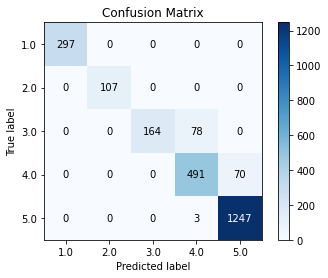



Classification report:-

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       297
         2.0       1.00      1.00      1.00       107
         3.0       1.00      0.68      0.81       242
         4.0       0.86      0.88      0.87       561
         5.0       0.95      1.00      0.97      1250

    accuracy                           0.94      2457
   macro avg       0.96      0.91      0.93      2457
weighted avg       0.94      0.94      0.94      2457

**************************************************************************


In [18]:
mnb = MultinomialNB(fit_prior = True)

print('Results for Multinomial naive bayes:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('Training time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)

y_pred_prob1 = mnb.predict_proba(X_train)
y_pred_prob = mnb.predict_proba(X_test)

cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)
loss1_mnb = log_loss(y_train,y_pred_prob1)
loss2_mnb = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',mnb_miss)
print('Total % of missclassified points(test data) = ',mnb_miss/len(y_test))

print('\n\nTraining log_loss = ',loss1_mnb)
print('Tesing log_loss = ',loss2_mnb)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

MNB = [acc1_mnb,acc2_mnb,mnb_miss,mnb_miss/len(y_test),loss1_mnb,loss2_mnb,mnb_time,mnb_time2]

Results for Logistic regression:-

Training time(sec) =  4.663540601730347
Prediction time(sec) =  0.0


Training score =  0.9777066405326357
Tesing score =  0.9743680570409982


No of missclassified for class 1 (test data) = 0 
No of missclassified for class 2 (test data) = 0 
No of missclassified for class 3 (test data) = 0 
No of missclassified for class 4 (test data) = 71 
No of missclassified for class 5 (test data) = 2 
Total no of missclassified points(test data) =  73
Total % of missclassified points(test data) =  0.02971102971102971


Training log_loss =  0.07614051437714321
Tesing log_loss =  0.08027761365771544


Confusion matrix:


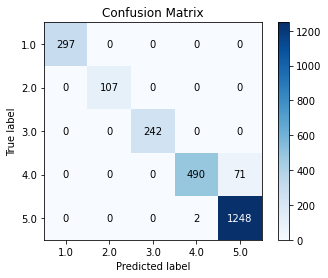



Classification report:-

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       297
         2.0       1.00      1.00      1.00       107
         3.0       1.00      1.00      1.00       242
         4.0       1.00      0.87      0.93       561
         5.0       0.95      1.00      0.97      1250

    accuracy                           0.97      2457
   macro avg       0.99      0.97      0.98      2457
weighted avg       0.97      0.97      0.97      2457

**************************************************************************


In [19]:
lr=LogisticRegression(n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('Training time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

y_pred_prob1 =lr.predict_proba(X_train)
y_pred_prob=lr.predict_proba(X_test)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
loss1_lr = log_loss(y_train,y_pred_prob1)
loss2_lr = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',lr_miss)
print('Total % of missclassified points(test data) = ',lr_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_lr)
print('Tesing log_loss = ',loss2_lr)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LR = [acc1_lr,acc2_lr,lr_miss,lr_miss/len(y_test),loss1_lr,loss2_lr,lr_time,lr_time2]

Results for Support vector Classification:-

Training time(sec) =  0.22385692596435547
Prediction time(sec) =  0.05187797546386719


Training score =  0.9791105528592634
Tesing score =  0.9736946563675974


No of missclassified for class 1 (test data) = 1 
No of missclassified for class 2 (test data) = 0 
No of missclassified for class 3 (test data) = 0 
No of missclassified for class 4 (test data) = 71 
No of missclassified for class 5 (test data) = 2 
Total no of missclassified points(test data) =  74
Total % of missclassified points(test data) =  0.030118030118030117


Training log_loss =  0.07614051437714321
Tesing log_loss =  0.08027761365771544


Confusion matrix:


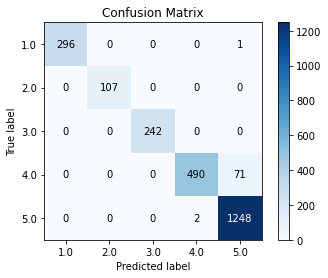



Classification report:-

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       297
         2.0       1.00      1.00      1.00       107
         3.0       1.00      1.00      1.00       242
         4.0       1.00      0.87      0.93       561
         5.0       0.95      1.00      0.97      1250

    accuracy                           0.97      2457
   macro avg       0.99      0.97      0.98      2457
weighted avg       0.97      0.97      0.97      2457

**************************************************************************


In [20]:
from sklearn.svm import SVC
svc=SVC()

print('Results for Support vector Classification:-\n')
start_time = time.time()
svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('Training time(sec) = ',svc_time)

y_pred1 = svc.predict(X_train)

start_time = time.time()
y_pred = svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)

# y_pred_prob1 =svc.predict_proba(X_train)
# y_pred_prob=svc.predict_proba(X_test)

cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)
loss1_svc = log_loss(y_train,y_pred_prob1)
loss2_svc = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_svc)
print('Tesing score = ',acc2_svc)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_svc[i])-cm_svc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',svc_miss)
print('Total % of missclassified points(test data) = ',svc_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_svc)
print('Tesing log_loss = ',loss2_svc)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

SVC = [acc1_svc,acc2_svc,svc_miss,svc_miss/len(y_test),loss1_svc,loss2_svc,svc_time,svc_time2]

In [21]:
s1=[MNB,LR,SVC]
s2=['MNB','LR','SVC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

In [22]:
temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})

In [23]:
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,MNB,0.915410,0.910102,151,0.061457,0.121548,0.125498,0.008000,0.000000
1,LR,0.977707,0.974368,73,0.029711,0.076141,0.080278,4.663541,0.000000
2,SVC,0.979111,0.973695,74,0.030118,0.076141,0.080278,0.223857,0.051878


<h3>With class weight balanced

Results for Multinomial naive bayes:-

Training time(sec) =  0.007745265960693359
Prediction time(sec) =  0.0


Training score =  0.9224220244753777
Tesing score =  0.922947671366067


No of missclassified for class 1 (test data) = 0 
No of missclassified for class 2 (test data) = 0 
No of missclassified for class 3 (test data) = 78 
No of missclassified for class 4 (test data) = 3 
No of missclassified for class 5 (test data) = 72 
Total no of missclassified points(test data) =  153
Total % of missclassified points(test data) =  0.06227106227106227


Training log_loss =  0.1558415224715807
Tesing log_loss =  0.15225737574136583


Confusion matrix:


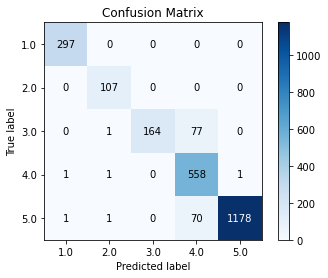



Classification report:-

              precision    recall  f1-score   support

         1.0       0.99      1.00      1.00       297
         2.0       0.97      1.00      0.99       107
         3.0       1.00      0.68      0.81       242
         4.0       0.79      0.99      0.88       561
         5.0       1.00      0.94      0.97      1250

    accuracy                           0.94      2457
   macro avg       0.95      0.92      0.93      2457
weighted avg       0.95      0.94      0.94      2457

**************************************************************************


In [24]:
#Fit prior is set to false since data is not balanced
mnb = MultinomialNB(fit_prior = False)

print('Results for Multinomial naive bayes:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('Training time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)

y_pred_prob1 = mnb.predict_proba(X_train)
y_pred_prob = mnb.predict_proba(X_test)

cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)
loss1_mnb = log_loss(y_train,y_pred_prob1)
loss2_mnb = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',mnb_miss)
print('Total % of missclassified points(test data) = ',mnb_miss/len(y_test))

print('\n\nTraining log_loss = ',loss1_mnb)
print('Tesing log_loss = ',loss2_mnb)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

MNB = [acc1_mnb,acc2_mnb,mnb_miss,mnb_miss/len(y_test),loss1_mnb,loss2_mnb,mnb_time,mnb_time2]

Results for Logistic regression:-

Training time(sec) =  3.2320268154144287
Prediction time(sec) =  0.0


Training score =  0.9862388505631431
Tesing score =  0.9875704812834225


No of missclassified for class 1 (test data) = 0 
No of missclassified for class 2 (test data) = 0 
No of missclassified for class 3 (test data) = 0 
No of missclassified for class 4 (test data) = 3 
No of missclassified for class 5 (test data) = 71 
Total no of missclassified points(test data) =  74
Total % of missclassified points(test data) =  0.030118030118030117


Training log_loss =  0.08370039869102008
Tesing log_loss =  0.08411585240641427


Confusion matrix:


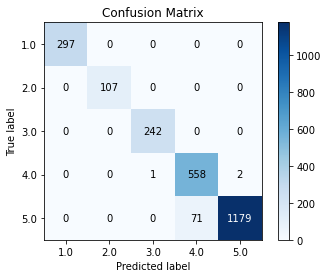



Classification report:-

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       297
         2.0       1.00      1.00      1.00       107
         3.0       1.00      1.00      1.00       242
         4.0       0.89      0.99      0.94       561
         5.0       1.00      0.94      0.97      1250

    accuracy                           0.97      2457
   macro avg       0.98      0.99      0.98      2457
weighted avg       0.97      0.97      0.97      2457

**************************************************************************


In [25]:
lr=LogisticRegression(class_weight='balanced', n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('Training time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

y_pred_prob1 =lr.predict_proba(X_train)
y_pred_prob=lr.predict_proba(X_test)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
loss1_lr = log_loss(y_train,y_pred_prob1)
loss2_lr = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',lr_miss)
print('Total % of missclassified points(test data) = ',lr_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_lr)
print('Tesing log_loss = ',loss2_lr)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LR = [acc1_lr,acc2_lr,lr_miss,lr_miss/len(y_test),loss1_lr,loss2_lr,lr_time,lr_time2]

Results for Support vector Classification:-

Training time(sec) =  0.28479790687561035
Prediction time(sec) =  0.06244659423828125


Training score =  0.9864521838964764
Tesing score =  0.9877304812834226


No of missclassified for class 1 (test data) = 0 
No of missclassified for class 2 (test data) = 0 
No of missclassified for class 3 (test data) = 0 
No of missclassified for class 4 (test data) = 3 
No of missclassified for class 5 (test data) = 70 
Total no of missclassified points(test data) =  73
Total % of missclassified points(test data) =  0.02971102971102971


Training log_loss =  0.08370039869102008
Tesing log_loss =  0.08411585240641427


Confusion matrix:


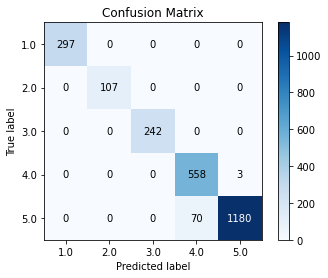



Classification report:-

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       297
         2.0       1.00      1.00      1.00       107
         3.0       1.00      1.00      1.00       242
         4.0       0.89      0.99      0.94       561
         5.0       1.00      0.94      0.97      1250

    accuracy                           0.97      2457
   macro avg       0.98      0.99      0.98      2457
weighted avg       0.97      0.97      0.97      2457

**************************************************************************


In [26]:
from sklearn.svm import SVC
svc=SVC(class_weight='balanced')

print('Results for Support vector Classification:-\n')
start_time = time.time()
svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('Training time(sec) = ',svc_time)

y_pred1 = svc.predict(X_train)

start_time = time.time()
y_pred = svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)

# y_pred_prob1 =svc.predict_proba(X_train)
# y_pred_prob=svc.predict_proba(X_test)

cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)
loss1_svc = log_loss(y_train,y_pred_prob1)
loss2_svc = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_svc)
print('Tesing score = ',acc2_svc)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_svc[i])-cm_svc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',svc_miss)
print('Total % of missclassified points(test data) = ',svc_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_svc)
print('Tesing log_loss = ',loss2_svc)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

SVC = [acc1_svc,acc2_svc,svc_miss,svc_miss/len(y_test),loss1_svc,loss2_svc,svc_time,svc_time2]

In [27]:
s1=[MNB,LR,SVC]
s2=['MNB','LR','SVC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result2=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result2[s2[i]] = s1[i]

In [28]:
temp = pd.DataFrame.from_dict(result2, orient='index',columns=col).reset_index()
result2 = temp.rename(columns={'index':'Classifiers'})

In [29]:
#Class balanced
result2

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,MNB,0.922422,0.922948,153,0.062271,0.155842,0.152257,0.007745,0.000000
1,LR,0.986239,0.987570,74,0.030118,0.083700,0.084116,3.232027,0.000000
2,SVC,0.986452,0.987730,73,0.029711,0.083700,0.084116,0.284798,0.062447


In [30]:
#Class not balanced
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,MNB,0.915410,0.910102,151,0.061457,0.121548,0.125498,0.008000,0.000000
1,LR,0.977707,0.974368,73,0.029711,0.076141,0.080278,4.663541,0.000000
2,SVC,0.979111,0.973695,74,0.030118,0.076141,0.080278,0.223857,0.051878


In [32]:
from joblib import dump
dump(vectorizer,'vec1.joblib') 
dump(svc,'svc1.joblib') 

['svc1.joblib']

#### Using review_text column

In [33]:
df=pd.read_csv(r"data.csv")
df = df[['review_text','rating']]
df.head()

,review_text,rating
0,"Amazing Product, bass is amazing and easy to c...",4.0
1,Worth it If you think to buy a tws then it is ...,5.0
2,Good and well but still some batter time impro...,3.0
3,As they rightly say about Chinese Products: Ch...,1.0
4,I am writing this review after using this prod...,3.0


In [34]:
def preprocess_text(s):
    l=[]
    for i in s:
        if (i.isalnum()) or (i==' '):
            l.append(i.lower())
        else:
            l.append(' ')
    return ''.join(l).strip()

In [35]:
df['review_text'] = df['review_text'].apply(lambda x : preprocess_text(x))

In [53]:
import spacy
nlp = spacy.load('en_core_web_sm')

import re
import contractions
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
stop_words.discard('not')

In [54]:
def process(sent):
    sent = contractions.fix(sent)
    sent = sent.lower()
    sent = re.sub(r'[^\w\s]','', sent) 
    d = nlp(sent)
    tokens=[]
    
    for i in d:
        if i.lemma_ != '-PRON-':
            tokens.append(i.lemma_)
            
    tokens = [tok for tok in tokens if tok not in stop_words]

    tokens = ' '.join(tokens)
    return tokens

In [55]:
df['review_text'] = df['review_text'].apply(lambda x: process(x))

In [56]:
X=df.iloc[:,df.columns !='rating']
y=df.iloc[:,df.columns =='rating']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=101)

In [58]:
X_train.shape,X_test.shape

((7368, 1), (2457, 1))

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase=False)
X_train = vectorizer.fit_transform(X_train.values.ravel())
X_test = vectorizer.transform(X_test.values.ravel())

In [60]:
X_train.shape,X_test.shape

((7368, 3638), (2457, 3638))

In [61]:
label = [1,2,3,4,5]

Results for Multinomial naive bayes:-

Training time(sec) =  0.015981197357177734
Prediction time(sec) =  0.0


Training score =  0.5738118009839013
Tesing score =  0.4291605955232603


No of missclassified for class 1 (test data) = 67 
No of missclassified for class 2 (test data) = 102 
No of missclassified for class 3 (test data) = 191 
No of missclassified for class 4 (test data) = 419 
No of missclassified for class 5 (test data) = 174 
Total no of missclassified points(test data) =  953
Total % of missclassified points(test data) =  0.38787138787138786


Training log_loss =  0.897760901740312
Tesing log_loss =  1.002270410785877


Confusion matrix:


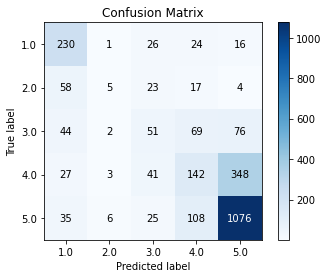



Classification report:-

              precision    recall  f1-score   support

         1.0       0.58      0.77      0.67       297
         2.0       0.29      0.05      0.08       107
         3.0       0.31      0.21      0.25       242
         4.0       0.39      0.25      0.31       561
         5.0       0.71      0.86      0.78      1250

    accuracy                           0.61      2457
   macro avg       0.46      0.43      0.42      2457
weighted avg       0.56      0.61      0.57      2457

**************************************************************************


In [62]:
#Fit prior is set to false since data is not balanced
mnb = MultinomialNB(fit_prior = False)

print('Results for Multinomial naive bayes:-\n')
start_time = time.time()
mnb.fit(X_train,y_train)
mnb_time = (time.time() - start_time)
print('Training time(sec) = ',mnb_time)

y_pred1 = mnb.predict(X_train)

start_time = time.time()
y_pred = mnb.predict(X_test)
mnb_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',mnb_time2)

y_pred_prob1 = mnb.predict_proba(X_train)
y_pred_prob = mnb.predict_proba(X_test)

cm_mnb = confusion_matrix(y_test, y_pred)
mnb_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_mnb = balanced_accuracy_score(y_train,y_pred1)
acc2_mnb = balanced_accuracy_score(y_test,y_pred)
loss1_mnb = log_loss(y_train,y_pred_prob1)
loss2_mnb = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_mnb)
print('Tesing score = ',acc2_mnb)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_mnb[i])-cm_mnb[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
print('Total no of missclassified points(test data) = ',mnb_miss)
print('Total % of missclassified points(test data) = ',mnb_miss/len(y_test))

print('\n\nTraining log_loss = ',loss1_mnb)
print('Tesing log_loss = ',loss2_mnb)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

MNB = [acc1_mnb,acc2_mnb,mnb_miss,mnb_miss/len(y_test),loss1_mnb,loss2_mnb,mnb_time,mnb_time2]

Results for Logistic regression:-

Training time(sec) =  5.084901332855225
Prediction time(sec) =  0.008025646209716797


Training score =  0.7076887748824139
Tesing score =  0.49108276324812083


No of missclassified for class 1 (test data) = 98 
No of missclassified for class 2 (test data) = 65 
No of missclassified for class 3 (test data) = 157 
No of missclassified for class 4 (test data) = 333 
No of missclassified for class 5 (test data) = 456 
Total no of missclassified points(test data) =  1109
Total % of missclassified points(test data) =  0.45136345136345135


Training log_loss =  0.8897328390024114
Tesing log_loss =  1.0568042256909553


Confusion matrix:


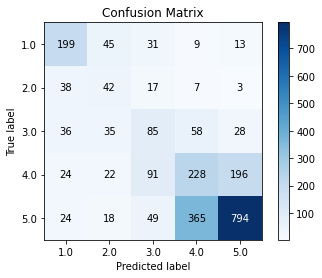



Classification report:-

              precision    recall  f1-score   support

         1.0       0.62      0.67      0.64       297
         2.0       0.26      0.39      0.31       107
         3.0       0.31      0.35      0.33       242
         4.0       0.34      0.41      0.37       561
         5.0       0.77      0.64      0.70      1250

    accuracy                           0.55      2457
   macro avg       0.46      0.49      0.47      2457
weighted avg       0.59      0.55      0.56      2457

**************************************************************************


In [63]:
lr=LogisticRegression(class_weight='balanced', n_jobs=-1)

print('Results for Logistic regression:-\n')
start_time = time.time()
lr.fit(X_train,y_train)
lr_time = (time.time() - start_time)
print('Training time(sec) = ',lr_time)

y_pred1 = lr.predict(X_train)

start_time = time.time()
y_pred = lr.predict(X_test)
lr_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',lr_time2)

y_pred_prob1 =lr.predict_proba(X_train)
y_pred_prob=lr.predict_proba(X_test)

cm_lr = confusion_matrix(y_test, y_pred)
lr_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_lr = balanced_accuracy_score(y_train,y_pred1)
acc2_lr = balanced_accuracy_score(y_test,y_pred)
loss1_lr = log_loss(y_train,y_pred_prob1)
loss2_lr = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_lr)
print('Tesing score = ',acc2_lr)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_lr[i])-cm_lr[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',lr_miss)
print('Total % of missclassified points(test data) = ',lr_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_lr)
print('Tesing log_loss = ',loss2_lr)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

LR = [acc1_lr,acc2_lr,lr_miss,lr_miss/len(y_test),loss1_lr,loss2_lr,lr_time,lr_time2]

Results for Support vector Classification:-

Training time(sec) =  9.662116527557373
Prediction time(sec) =  2.0831692218780518


Training score =  0.8418345879003443
Tesing score =  0.5251623001568486


No of missclassified for class 1 (test data) = 75 
No of missclassified for class 2 (test data) = 73 
No of missclassified for class 3 (test data) = 145 
No of missclassified for class 4 (test data) = 295 
No of missclassified for class 5 (test data) = 393 
Total no of missclassified points(test data) =  981
Total % of missclassified points(test data) =  0.3992673992673993


Training log_loss =  0.8897328390024114
Tesing log_loss =  1.0568042256909553


Confusion matrix:


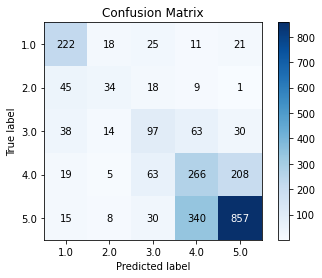



Classification report:-

              precision    recall  f1-score   support

         1.0       0.65      0.75      0.70       297
         2.0       0.43      0.32      0.37       107
         3.0       0.42      0.40      0.41       242
         4.0       0.39      0.47      0.43       561
         5.0       0.77      0.69      0.72      1250

    accuracy                           0.60      2457
   macro avg       0.53      0.53      0.52      2457
weighted avg       0.62      0.60      0.61      2457

**************************************************************************


In [64]:
from sklearn.svm import SVC
svc=SVC(class_weight='balanced')

print('Results for Support vector Classification:-\n')
start_time = time.time()
svc.fit(X_train,y_train)
svc_time = (time.time() - start_time)
print('Training time(sec) = ',svc_time)

y_pred1 = svc.predict(X_train)

start_time = time.time()
y_pred = svc.predict(X_test)
svc_time2 = (time.time() - start_time)
print('Prediction time(sec) = ',svc_time2)

# y_pred_prob1 =svc.predict_proba(X_train)
# y_pred_prob=svc.predict_proba(X_test)

cm_svc = confusion_matrix(y_test, y_pred)
svc_miss = np.sum(y_pred!=y_test.values.ravel())
acc1_svc = balanced_accuracy_score(y_train,y_pred1)
acc2_svc = balanced_accuracy_score(y_test,y_pred)
loss1_svc = log_loss(y_train,y_pred_prob1)
loss2_svc = log_loss(y_test,y_pred_prob)

print('\n\nTraining score = ',acc1_svc)
print('Tesing score = ',acc2_svc)
print('\n')

for i in range(len(y_train['rating'].unique())):
    err = np.sum(cm_svc[i])-cm_svc[i][i]
    print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
    
print('Total no of missclassified points(test data) = ',svc_miss)
print('Total % of missclassified points(test data) = ',svc_miss/len(y_test))
print('\n\nTraining log_loss = ',loss1_svc)
print('Tesing log_loss = ',loss2_svc)
print('\n\nConfusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()
print('\n\nClassification report:-\n')
print(classification_report(y_test,y_pred))
print('**************************************************************************')

SVC = [acc1_svc,acc2_svc,svc_miss,svc_miss/len(y_test),loss1_svc,loss2_svc,svc_time,svc_time2]

In [65]:
s1=[MNB,LR,SVC]
s2=['MNB','LR','SVC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result3=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result3[s2[i]] = s1[i]

In [66]:
temp = pd.DataFrame.from_dict(result3, orient='index',columns=col).reset_index()
result3 = temp.rename(columns={'index':'Classifiers'})

In [67]:
#Class balanced
result3

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,MNB,0.573812,0.429161,953,0.387871,0.897761,1.002270,0.015981,0.000000
1,LR,0.707689,0.491083,1109,0.451363,0.889733,1.056804,5.084901,0.008026
2,SVC,0.841835,0.525162,981,0.399267,0.889733,1.056804,9.662117,2.083169


In [68]:
result2

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,MNB,0.922422,0.922948,153,0.062271,0.155842,0.152257,0.007745,0.000000
1,LR,0.986239,0.987570,74,0.030118,0.083700,0.084116,3.232027,0.000000
2,SVC,0.986452,0.987730,73,0.029711,0.083700,0.084116,0.284798,0.062447
